<p1>Import the package and the dataframe

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy
# path_to_data = './data/'
# training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
# test = pd.read_csv(path_to_data + 'test_set.csv', sep=',', header=0)
# training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)
# test_info = pd.read_csv(path_to_data + 'test_info.csv', sep=',', header=0)

<p1>A function which check the amount of mails and senders

In [134]:
def check_info_set(info_filename,set_filename):
    training_info = pd.read_csv(training_info_filename, sep=',', header=0)
    training = pd.read_csv(training_set_filename, sep=',', header=0)

    mailIds2 = []
    for mails in training['mids'].tolist():
        mails = mails.split(' ')
        mailIds2.append(mails)
    print "%d senders,correct!"%len(mailIds2) if len(mailIds2)==125 else "Sender(s) missing"

    mailIds2 = [int(mail) for sublist in mailIds2 for mail in sublist]

    print "There is %d mails in training_set"%len(mailIds2)

    print "There is %d mails in training_info"%len(training_info['mid'].tolist())

    print "Checked, they are in Bijection" if set(mailIds2)==set(training_info['mid'].tolist()) else "Not the same"

<p1> A function who generate new info and set which include the mails most recently

In [108]:
def get_most_recently_mail(traing_info_filename,training_set_filename,most_recently=1000):
    mid_date = pd.read_csv(training_info_filename, sep=',', header=0)
    mid_date = training_info.drop(['body','recipients'], 1)
    
    training_set = pd.read_csv(training_set_filename, sep=',', header=0)

    for index,serie in training_set.iterrows():
        row = serie.tolist()
        mids = row[1].split(" ")
        mids = [int(x) for x in mids]
        cache = mid_date['mid'].tolist()
        cache = [int(x) for x in cache if x in mids]
        if len(cache)>most_recently:
            cache = cache[:most_recently]

        midStr = ' '.join(str(x) for x in cache)
        training_set['mids'].iloc[index] = midStr

    training_info = pd.read_csv(training_info_filename, sep=',', header=0)

    allMids = []
    for index,serie in training_set.iterrows():
        row = serie.tolist()
        mids = row[1].split(" ")
        allMids.append(mids)

    allMids = [int(x) for sublist in allMids for x in sublist]
    training_info = training_info[training_info['mid'].isin(allMids)]
    
    
    return training_info,training_set

<p1>A function who plot a histogram to present the frequency of mails by date in the file training_info

In [109]:
def count_by_date(training_info_filename):
    training_info = pd.read_csv(training_info_filename, sep=',', header=0)
    training_info.date = training_info.date.astype("datetime64[ns]")
    training_info['date'].groupby([training_info.date.dt.year,training_info.date.dt.month]).count().plot.bar()
    plt.show()

<h3>Get the frequency of mails for each month

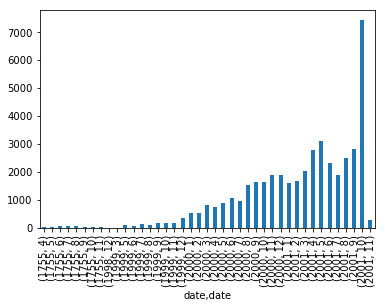

In [4]:
training_info_filename = './data/training_info.csv'
count_by_date(training_info_filename)

<h3>Generate the training_info and set which start from the year 2001

In [23]:
training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)
training_info = training_info[training_info.date.str.startswith(("2001","2002"))==True]
file_name = path_to_data + 'training_info_startsFrom_2001.csv'
training_info.to_csv(file_name, sep=',', encoding='utf-8', index=False)

training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)
listRemove = training_info[training_info.date.str.startswith(("2001","2002"))==False]['mid'].tolist()
listRemove = [int(x) for x in listRemove]

training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
training_info_2001 = pd.read_csv(path_to_data + 'training_info_startsFrom_2001.csv', sep=',', header=0)
for index,serie in training.iterrows():
    row = serie.tolist()
    sender = row[0]
    mids = row[1]
    mids = mids.split(" ")
    mids = [int(x) for x in mids]
    mids = [x for x in mids if x not in listRemove]
    strMids = " ".join(str(x) for x in mids)
    training['mids'].iloc[index] = strMids
file_name = path_to_data + 'training_set_startsFrom_2001.csv'
training.to_csv(file_name, sep=',', encoding='utf-8', index=False)

28312
['2001-09-28 14:40:39', '2001-07-27 14:32:59', '2001-07-20 11:52:09', '2001-07-13 07:59:42', '2001-07-16 08:02:27', '2001-07-12 11:53:21', '2001-07-02 08:44:21', '2001-09-28 09:10:54', '2001-09-26 09:51:12', '2001-07-31 08:21:01']


<p>Check the bijection of training_info_startsFrom2001 and training_set_startsFrom2001

In [89]:
training_info_filename = path_to_data + 'training_info_startsFrom_2001.csv'
training_set_filename= path_to_data + 'training_set_startsFrom_2001.csv'
check_info_set(training_info_filename,training_set_filename)


125 senders,correct!
35932 mails
There is 28312 mails in training_set_2001
There is 28312 mails in training_info_2001
Checked


<h3>Get the max and min mails count of dataset

In [7]:
training_set = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
maxNum = 0
minNum = 1000

for index,serie in training_set.iterrows():
    row = serie.tolist()
    mids = row[1].split(" ")
    if len(mids)==4350:
        print "MaxMails:",row[0]
    if len(mids)>maxNum:
        maxNum = len(mids)
    if len(mids)==67:
        print "MinMails:",row[0]
    if len(mids)<minNum:
        minNum = len(mids)
print maxNum
print minNum


MinMails: david.port@enron.com
MaxMails: sara.shackleton@enron.com
4350
67


<h3>Generate the training_set and training_info which already remove the mails with wrong date
<h3>Named training_set_Removed0001.csv and training_info_Removed0001.csv

In [25]:
path_to_data = './data/'
training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
training_info = pd.read_csv(path_to_data + 'training_info.csv', sep=',', header=0)
training_info = training_info.sort_values(by='date',ascending=True)
training_info = training_info.drop(training_info.index[:202])
print training_info.date.head()
filename = path_to_data + 'training_info_Removed0001.csv'
training_info.to_csv(filename, sep=',', encoding='utf-8', index=False)

training_0001 = pd.read_csv(path_to_data + 'training_info_Removed0001.csv', sep=',', header=0)

listExist = training_0001.mid.tolist()
listExist = [int(x) for x in listExist]

training_set = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)
for index,serie in training_set.iterrows():
    row = serie.tolist()
    sender = row[0]
    mids = row[1]
    mids = mids.split(" ")
    mids = [int(x) for x in mids]
    mids = [x for x in mids if x in listExist]
    strMids = " ".join(str(x) for x in mids)
    training_set['mids'].iloc[index] = strMids
file_name = path_to_data + 'training_set_Removed0001.csv'
training_set.to_csv(file_name, sep=',', encoding='utf-8', index=False)

<h3>Check if training_info and training_set are correspond

In [106]:
training_info_filename = path_to_data + 'training_info_Removed0001.csv'
training_set_filename = path_to_data + 'training_set_Removed0001.csv'
check_info_set(training_info_filename,training_set_filename)

125 senders,correct!
There is 43411 mails in training_set
There is 43411 mails in training_info
Checked, they are in Bijection


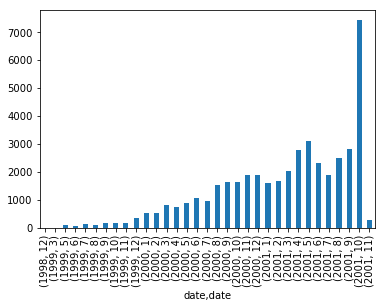

In [61]:
path_to_data = './data/Removed0001_0002/'
training_info_filename = path_to_data + 'training_info_Removed0001.csv'
training_info = pd.read_csv(training_info_filename, sep=',', header=0)


training_info.date = training_info.date.astype("datetime64[ns]")
training_info['date'].groupby([training_info.date.dt.year,training_info.date.dt.month]).count().plot.bar()
plt.show()

<p2>generate a dataset starts from 2001-07

In [135]:
training_info_filename = './data/Removed0001_0002/training_info_Removed0001.csv'
training_set_filename = './data/Removed0001_0002/training_set_Removed0001.csv'
training_info = pd.read_csv(training_info_filename, sep=',', header=0)
training = pd.read_csv(training_set_filename, sep=',', header=0)
print len(training_info.mid.tolist())

a = numpy.datetime64('2001-06-01')
training_info = training_info[training_info['date'].astype("datetime64[ns]") >= a.astype("datetime64[ns]")]

training_info = pd.read_csv(training_info_filename, sep=',', header=0)
training_info = training_info[training_info['date'].astype("datetime64[ns]") >= a.astype("datetime64[ns]")]
file_name = './data/Removed0001_0002/training_info_Removed0001_startsFrom2001-07.csv'
training_info.to_csv(file_name, sep=',', encoding='utf-8', index=False)

training_info = pd.read_csv('./data/Removed0001_0002/training_info_Removed0001.csv', sep=',', header=0)
listRemove = training_info[training_info['date'].astype("datetime64[ns]") < a.astype("datetime64[ns]")]['mid'].tolist()
listRemove = [int(x) for x in listRemove]

training = pd.read_csv(training_set_filename, sep=',', header=0)
training_info_from = pd.read_csv('./data/Removed0001_0002/training_info_Removed0001_startsFrom2001-07.csv', sep=',', header=0)
for index,serie in training.iterrows():
    row = serie.tolist()
    sender = row[0]
    mids = row[1]
    mids = mids.split(" ")
    mids = [int(x) for x in mids]
    mids = [x for x in mids if x not in listRemove]
    strMids = " ".join(str(x) for x in mids)
    training['mids'].iloc[index] = strMids
file_name = './data/Removed0001_0002/training_set_Removed0001_startsFrom2001-07.csv'
training.to_csv(file_name, sep=',', encoding='utf-8', index=False)


info_file = './data/Removed0001_0002/training_info_Removed0001_startsFrom2001-07.csv'
set_file = './data/Removed0001_0002/training_set_Removed0001_startsFrom2001-07.csv'
check_info_set(info_file,set_file)


43411
125 senders,correct!
There is 43411 mails in training_set
There is 43411 mails in training_info
Checked, they are in Bijection
